## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
try:
   df = pd.read_csv('/content/sample_data/QueryResults.csv', names = ['DATE','TAG','POSTS'], header=0)
   print(df)
except Exception as e:
   print("An error occurred:", e)
finally:
    df = pd.read_csv('QueryResults.csv', names = ['DATE','TAG','POSTS'], header=0)
    print(df)
    print("Data loaded successfully")

An error occurred: [Errno 2] No such file or directory: '/content/sample_data/QueryResults.csv'
                     DATE         TAG  POSTS
0     2008-07-01 00:00:00          c#      3
1     2008-08-01 00:00:00    assembly      8
2     2008-08-01 00:00:00  javascript    162
3     2008-08-01 00:00:00           c     85
4     2008-08-01 00:00:00      python    124
...                   ...         ...    ...
1986  2020-07-01 00:00:00           r   5694
1987  2020-07-01 00:00:00          go    743
1988  2020-07-01 00:00:00        ruby    775
1989  2020-07-01 00:00:00        perl    182
1990  2020-07-01 00:00:00       swift   3607

[1991 rows x 3 columns]
Data loaded successfully


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [6]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [7]:
no_of_entries_in_date_column = df["DATE"].count()
print(f"The number of entries in the date column is {no_of_entries_in_date_column}")

The number of entries in the date column is 1991


In [9]:
no_of_entries_in_tag_column = df["TAG"].count()
print(f"The number of entries in the tag column is {no_of_entries_in_tag_column}")

The number of entries in the tag column is 1991


In [15]:
no_of_entries_in_posts_column = df["POSTS"].count()
print(f"The number of entries in the posts column is {no_of_entries_in_posts_column}")

The number of entries in the posts column is 1991


In [16]:
df.count()

,0
DATE,1991
TAG,1991
POSTS,1991


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [10]:
total_number_of_posts_per_language=df.groupby('TAG')['POSTS'].sum()
print(total_number_of_posts_per_language)

TAG
assembly        34852
c              336042
c#            1423530
c++            684210
delphi          46212
go              47499
java          1696403
javascript    2056510
perl            65286
php           1361988
python        1496210
r              356799
ruby           214582
swift          273055
Name: POSTS, dtype: int64


In [21]:
max_programming_language_posts_of_all_time = df.groupby("TAG")["POSTS"].sum().idxmax()
print(f"The programming language with the highest total number of posts of all time is {max_programming_language_posts_of_all_time}")

The programming language with the highest total number of posts of all time is javascript


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [23]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [11]:
# Which language had the fewest months with an entry?
min_months_with_entry = df.groupby('TAG')['DATE'].count().idxmin()
print(f"The language with the fewest months with an entry is {min_months_with_entry}")

The language with the fewest months with an entry is go


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [12]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [13]:
df.DATE[1]

'2008-08-01 00:00:00'

In [14]:
type(df.DATE[1])

str

In [15]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [16]:
# Convert Entire Column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [19]:
"""
Data Manipulation: Pivoting DataFrames

The .pivot() method

Sometimes you want to convert your DataFrame so that each category has its own column.

For example, suppose you needed to take the table below and create a separate column for each actor, where
each row is the Age of the actor:


How would you do this with the DataFrame below?

The easiest way to accomplish this is by using the .pivot() method in Pandas.
 Try the example for yourself.
 The thing to understand is how to supply the correct aguments to get the desired outcome.
 The index are the categories for the rows. The columns are the categories for the columns.
  And the values are what you want in the new cells.

  However, there's one very important thing to notice.

  What happens if a value is missing? In the example above there's no value for old Sylvester.

   In this case, the .pivot() method will insert a NaN value.

"""

test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [20]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [21]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [34]:
reshaped_df.shape

(145, 14)

In [22]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [23]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [24]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [ ]:
"""
Dealing with NaN Values

In this case, we don't want to drop the rows that have a NaN value.

Instead, we want to substitute the number 0 for each NaN value in the DataFrame. We can do this with the .fillna() method.

reshaped_df.fillna(0, inplace=True)
The inplace argument means that we are updating reshaped_df. Without this argument we would have to write something like this:

reshaped_df = reshaped_df.fillna(0)
Let's check if we successfully replaced all the NaN values in our DataFrame.

We can also check if there are any NaN values left in the entire DataFrame with this line:

reshaped_df.isna().values.any()

Here we are using the .isna() method that we've used before, but we're chaining two more things: the values attribute and the any() method.

 This means we don't have to search through the entire DataFrame to spot if .isna() is True.


"""

In [39]:
#reshaped_df.fillna(0, inplace=True)
reshaped_df = reshaped_df.fillna(0)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


In [25]:
reshaped_df.isna().values.any()

np.True_

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [ ]:
"""

Data Visualisation with Matplotlib

Matplotlib

To create our first charts we're going to use a library called Matplotlib. There are many different libraries in Python to help us create charts and graphs.

 Matplotlib is an incredibly popular one and it works beautifully in combination with Pandas, so let's check it out.

First, we have to import Matplotlib.

import matplotlib.pyplot as plt

Let's do this at the top:


Mini Challenge

You can actually show a line chart for the popularity of a programming language using only a single line of code.

 Can you use the .plot() documentation to figure out how to do this? Try and plot the popularity of the Java programming language.


 Here's what you're aiming for:






Solution

All you need to do is supply the values for the horizontal axis (the x-values) and the vertical axis (the y-values) for the chart.
The x-values are our dates and the y-values are the number of posts. We can supply these values to the .plot() function by position like so:

plt.plot(reshaped_df.index, reshaped_df.java)
or like so if you prefer the square bracket notation.

plt.plot(reshaped_df.index, reshaped_df['java'])


Styling the Chart

Let's look at a couple of methods that will help us style our chart:

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound



To make our chart larger we can provide a width (16) and a height (10) as the figsize of the figure.

plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)
This will make our chart easier to see. But when we increase the size of the chart, we should also increase the fontsize of the ticks on our axes so that they remain easy to read:


Now we can add labels. Also, we're never going to get less than 0 posts, so let's set a lower limit of 0 for the y-axis with .ylim().

plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)


"""

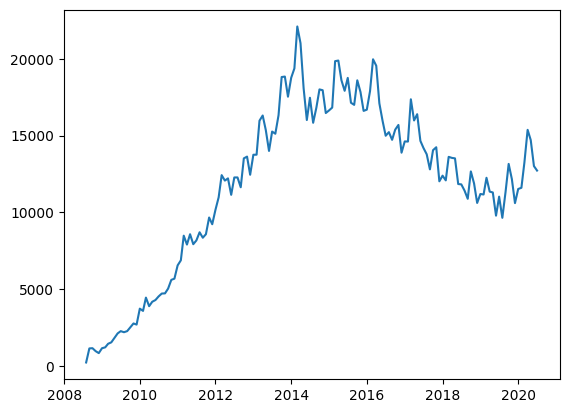

In [26]:
plt.plot(reshaped_df.index, reshaped_df.java)

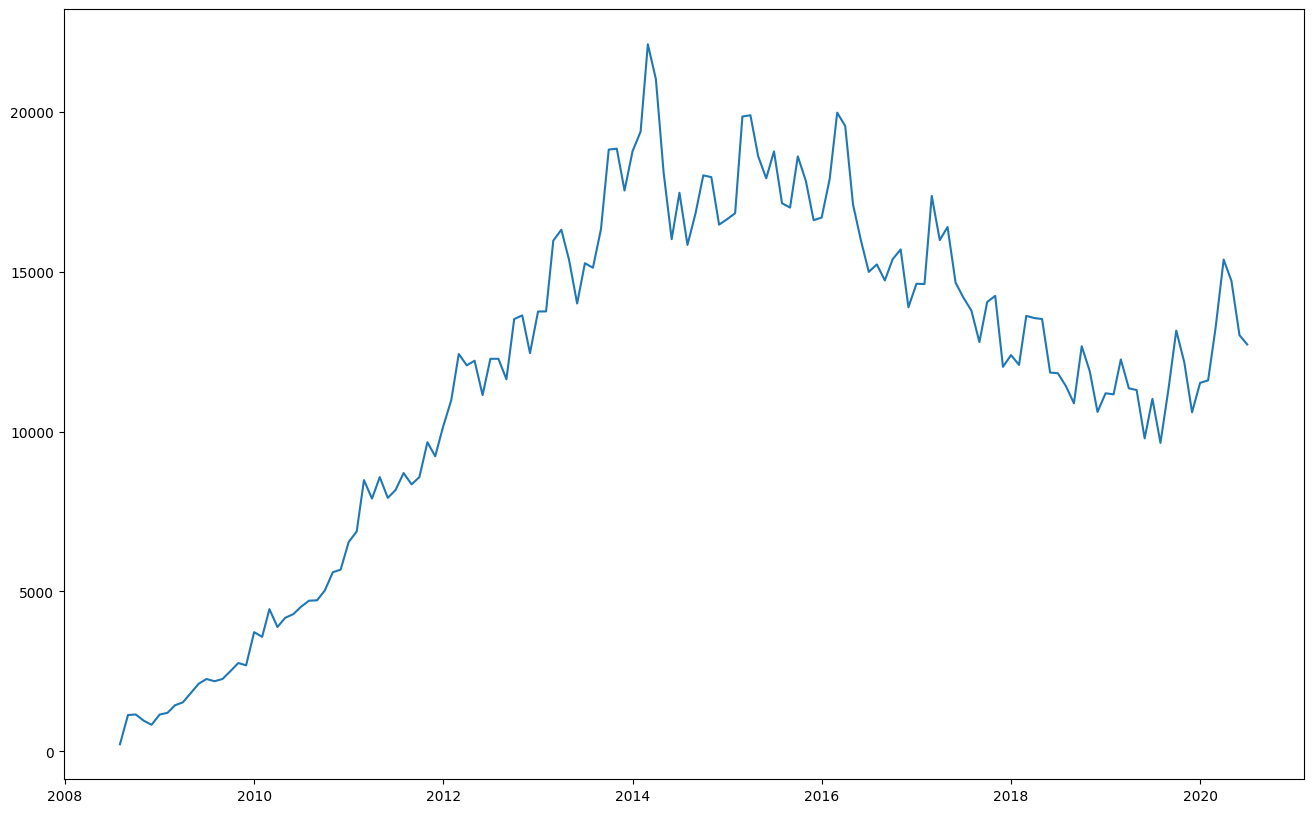

In [27]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index, reshaped_df.java)

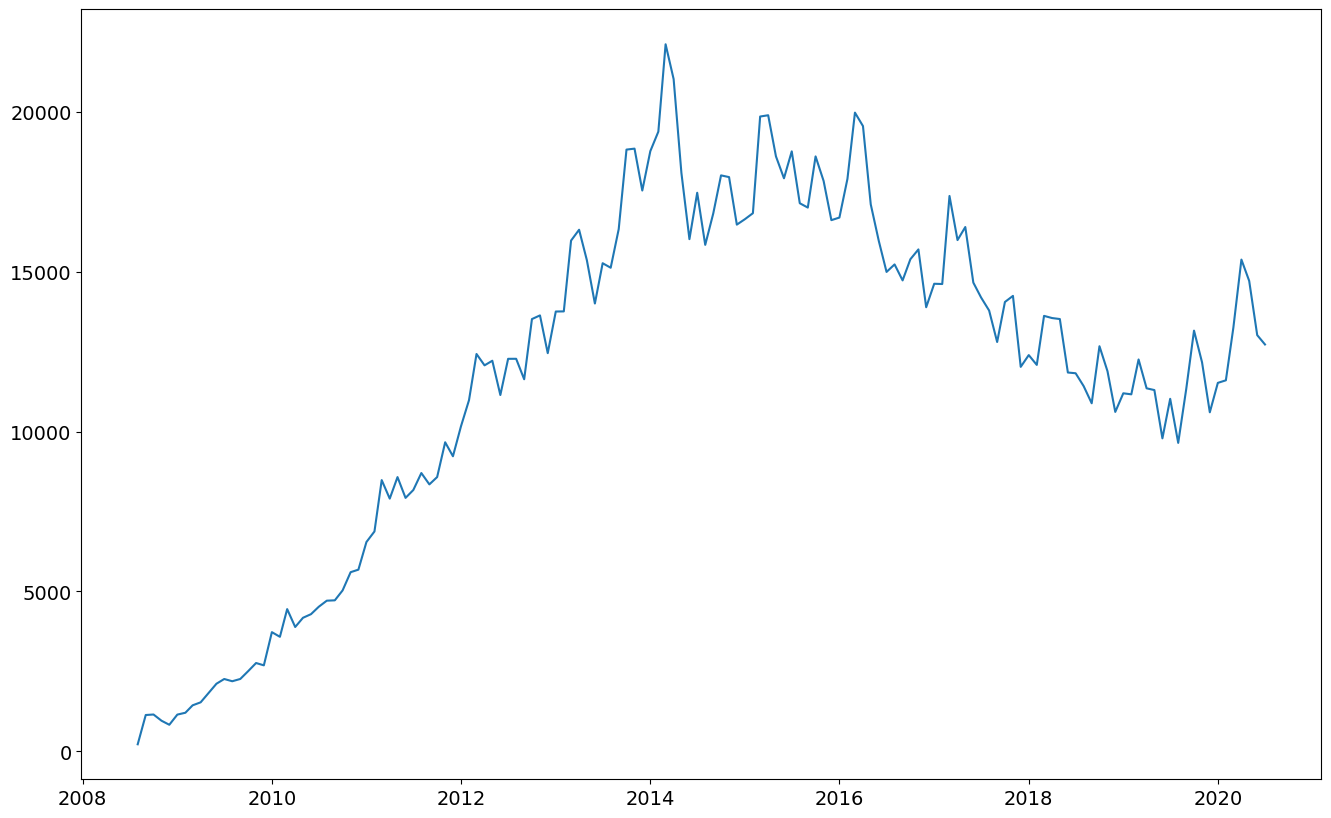

In [28]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

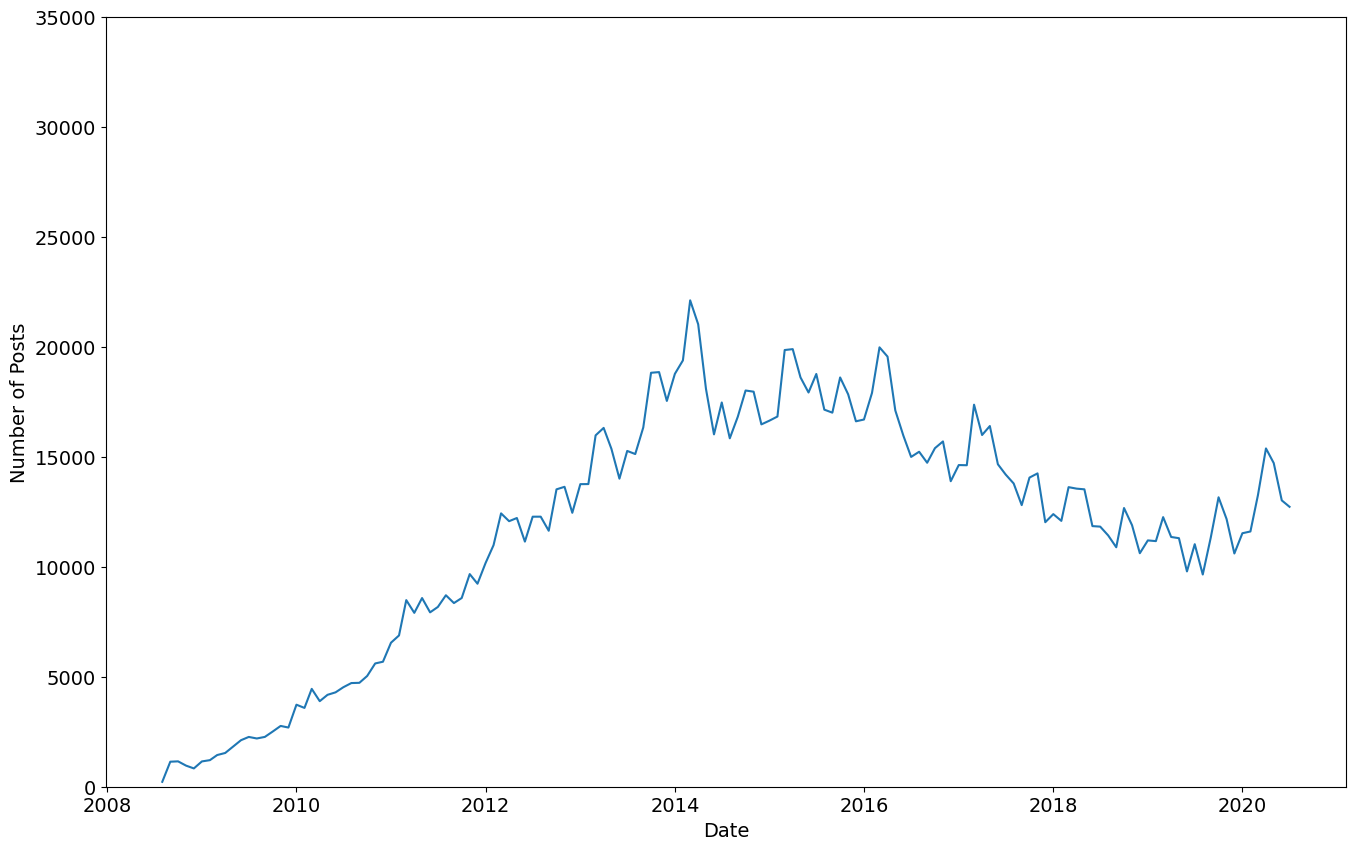

In [29]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

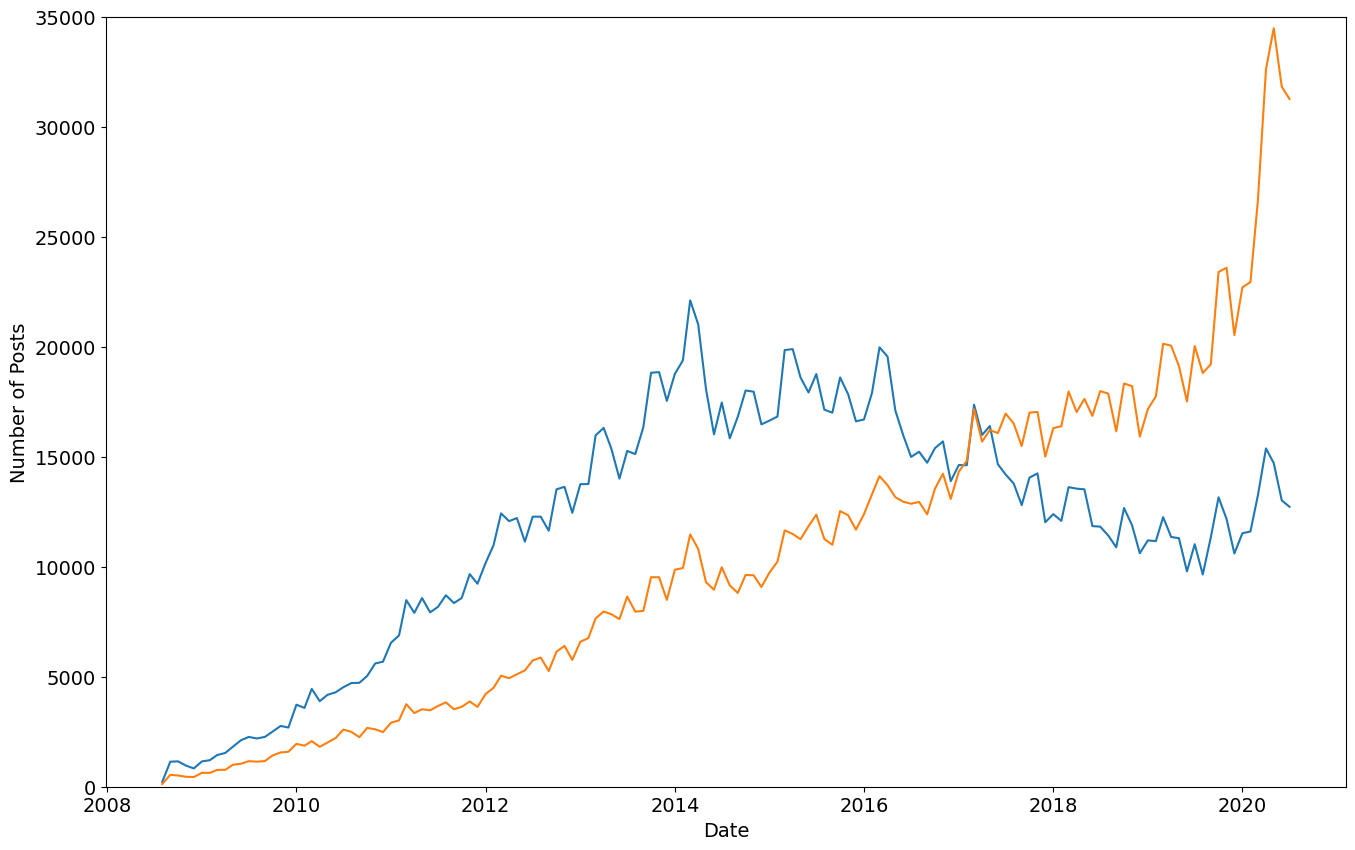

In [30]:
"""
Multi-Line Charts with Matplotib
Solution: Two Line Charts Next to Each Other

The trick is simply calling the .plot() method twice. That's all there is to it! =)

plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python) # Tadah!

But what if we wanted to plot all the programming languages on the same chart?

We don't want to type out .plot() a million times, right? We can actually just use a for-loop:

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

This will allow us to iterate over each column in the DataFrame and plot it on our chart.

 The final result should look like this:

 But wait, which language is which? It's really hard to make out without a legend that tells us which colour corresponds to each language.


  Let's modify the plotting code to add a label for each line based on the column name (and make the lines thicker at the same time using linewidth).


  Then let's add a legend to our chart:

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)
We should now see something like this:

Looks like Python is the most popular programming language judging by the number of posts on Stack Overflow! Python for the win! =)

"""

plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

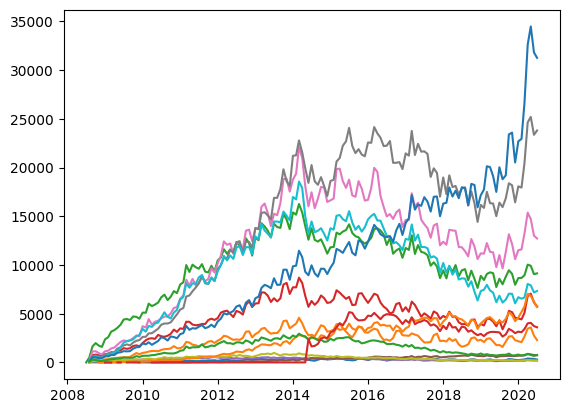

In [31]:
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

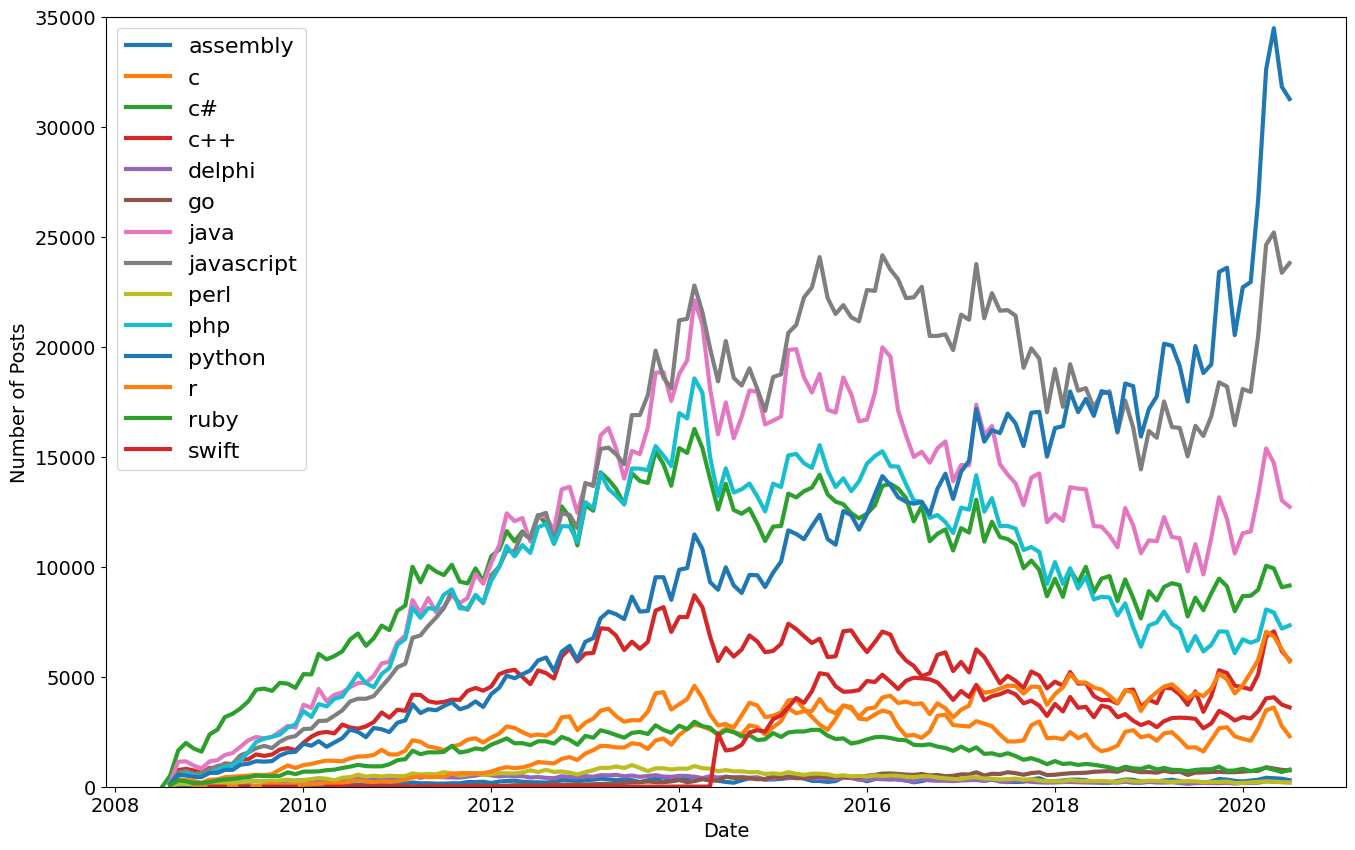

In [32]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [ ]:
"""
Smoothing out Time-Series Data

Looking at our chart we see that time-series data can be quite noisy, with a lot of up and down spikes.

This can sometimes make it difficult to see what's going on.

A useful technique to make a trend apparent is to smooth out the observations by taking an average.

By averaging say, 6 or 12 observations we can construct something called the rolling mean.

 Essentially we calculate the average in a window of time and move it forward by one observation at a time.

Since this is such a common technique, Pandas actually two handy methods already built-in: rolling() and mean().


 We can chain these two methods up to create a DataFrame made up of the averaged observations.

# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)
Now our chart looks something like this:

Play with the window argument (use 3 or 12) and see how the chart changes!

"""

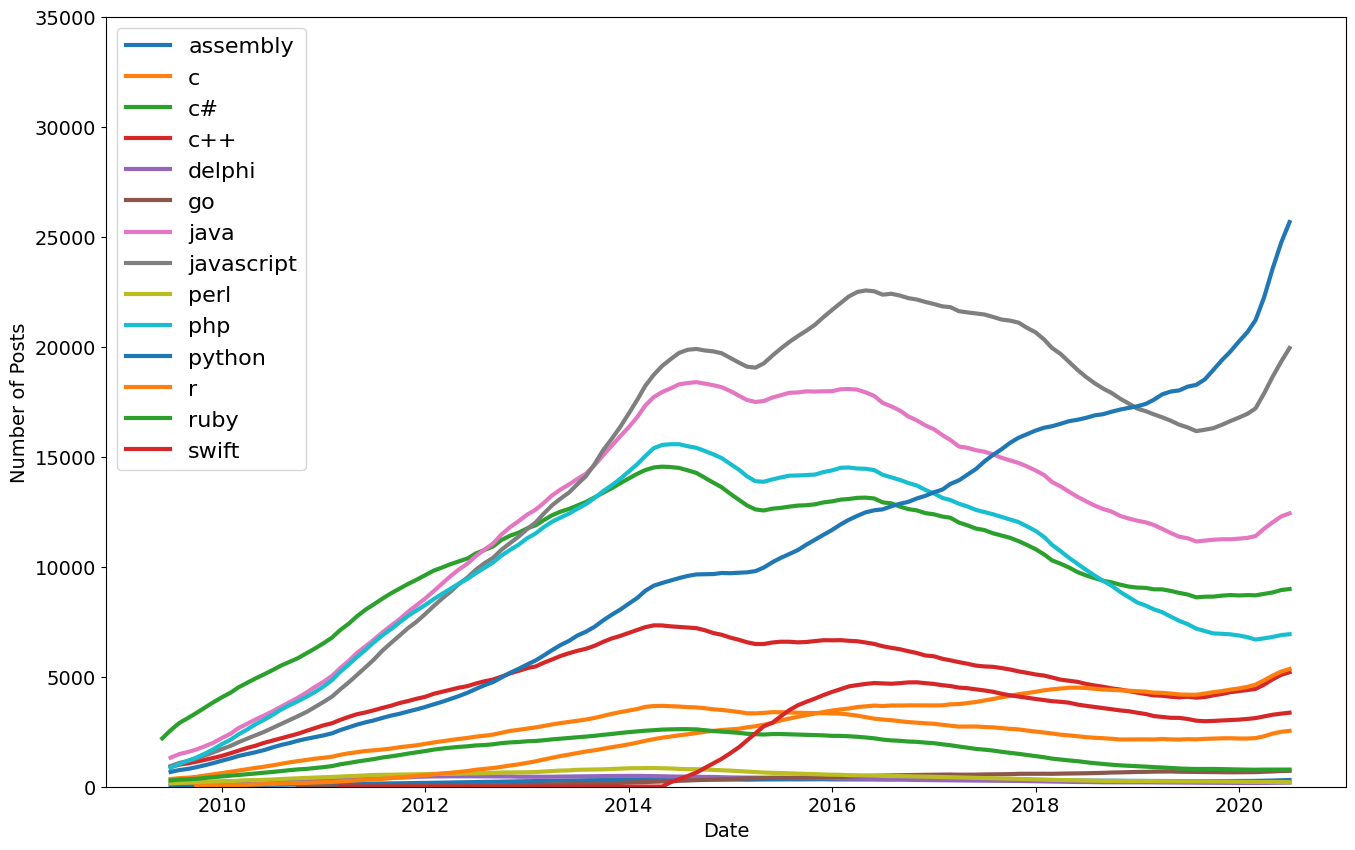

In [33]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

In [ ]:
"""

Learning Points & Summary

Congratulations on completing another challenging data science project!

 Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

used .groupby() to explore the number of posts and entries per programming language

converted strings to Datetime objects with to_datetime() for easier plotting

reshaped our DataFrame by converting categories to columns using .pivot()

used .count() and isna().values.any() to look for NaN values in our DataFrame, which we then replaced using .fillna()

created (multiple) line charts using .plot() with a for-loop

styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

added a legend to tell apart which line is which by colour

smoothed out our time-series observations with .rolling().mean() and plotted them to better identify trends over time.




"""